# Summarizing used Python libraries
This notebook demonstrates how one can dive into summarizing generated code, in this case which Python libraries were used. The `_result.jsonl` files contain a column `completion`, which contains Python code as string. These code snipptes can be summarized for each model as shown here, e.g. by searching for common Python libraries.

In [1]:
import pandas as pd
import os

In [2]:
directory = "../data/"
# if you want to investigate a single model only, add its name here:
search_term = ""

# Enter the terms to search for here
common_libraries = [
'numpy',
'scipy',
'skimage',
'cv2',
'pandas',
'pyclesperanto_prototype',
'vedo',
'umap',
'dask',
'zarr',
'circle_fit',
'statsmodels',
'xarray',
'pillow',
'nibabel',
'SimpleITK',
'trimesh',
'itk']




First we collect all results and the corresponding models from the jsonl files.

In [3]:
collection = []
for filename in os.listdir(directory):
    if search_term in filename and filename.endswith("_results.jsonl"):
        df = pd.read_json(directory + filename, lines=True)
        df['model'] = filename.replace("samples_","").replace("_results","").replace(".jsonl","")
        collection.append(df)

if len(collection) == 1:
    df = collection[0]
else:
    df = pd.concat(collection)

In [4]:
df

,task_id,completion,full_response,result,passed,model
0,../test_cases/apply_otsu_threshold_and_count_p...,\n# Plan:\n# 1. Import required libraries (cv2...,Here's the completed code with a step-by-step ...,failed: OpenCV(4.9.0) D:\a\opencv-python\openc...,False,claude-3-5-sonnet-20240620
1,../test_cases/binary_closing.ipynb,\n# Plan:\n# 1. Import necessary libraries (nu...,"Here's the completed code with a plan, necessa...",passed,True,claude-3-5-sonnet-20240620
2,../test_cases/binary_skeleton.ipynb,\n# Plan:\n# 1. Import necessary libraries (sk...,Here's the completed code with a step-by-step ...,failed: Input must be a 2D numpy array of bool...,False,claude-3-5-sonnet-20240620
3,../test_cases/bland_altman.ipynb,\n# Plan:\n# 1. Import required libraries (pan...,"Here's the completed code with a plan, necessa...",passed,True,claude-3-5-sonnet-20240620
4,../test_cases/combine_columns_of_tables.ipynb,\n# Plan:\n# 1. Import required library (panda...,Here's the completed code with a step-by-step ...,passed,True,claude-3-5-sonnet-20240620
...,...,...,...,...,...,...
565,../test_cases/workflow_batch_process_folder_me...,\n import os\n import pandas as pd\n ...,\n import os\n import pandas as pd\n ...,passed,True,reference
566,../test_cases/workflow_segmentation_counting.i...,\n import skimage\n import numpy as np\n...,\n import skimage\n import numpy as np\n...,passed,True,reference
567,../test_cases/workflow_segmentation_measuremen...,\n import skimage\n import numpy as np\n...,\n import skimage\n import numpy as np\n...,passed,True,reference
568,../test_cases/workflow_segment_measure_umap.ipynb,\n import numpy as np\n import pandas as...,\n import numpy as np\n import pandas as...,passed,True,reference


In [5]:
# Just some examples to get an idea
df.head(3)['completion'].tolist()

['\n# Plan:\n# 1. Import required libraries (cv2 for image processing, numpy for array operations)\n# 2. Convert the input image to grayscale if it\'s not already\n# 3. Apply Otsu\'s thresholding method to create a binary image\n# 4. Count the number of positive pixels (white pixels) in the binary image\n# 5. Return the count of positive pixels\n\nimport cv2\nimport numpy as np\n\ndef apply_otsu_threshold_and_count_postiive_pixels(image):\n    """\n    Takes an image, applies Otsu\'s threshold method to it to create a binary image and \n    counts the positive pixels.\n    """\n    # Convert image to grayscale if it\'s not already\n    if len(image.shape) > 2:\n        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)\n    else:\n        gray = image\n\n    # Apply Otsu\'s thresholding\n    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)\n\n    # Count positive pixels (white pixels)\n    positive_pixel_count = np.sum(binary == 255)\n\n    return positive_pixel

## Searching for common terms
First, we search the generated code for the common libraries as specified above.

In [6]:
# Define the function to count errors
def count_libs(group, lib_list):
    counts = {lib: group['completion'].str.contains(lib, regex=False).sum() for lib in lib_list}
    return pd.Series(counts)

# Apply the function to each model group
lib_counts = df.groupby('model').apply(count_libs, lib_list=common_libraries)

# Transpose the result for the desired format: models as columns, libs as rows
lib_counts = lib_counts.T

C:\Users\haase\AppData\Local\Temp\ipykernel_2264\760873324.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  lib_counts = df.groupby('model').apply(count_libs, lib_list=common_libraries)


In [7]:
# reorder columns to be similar to evaluation result plots
with open("model_order.txt", 'r') as f:
    columns_in_order = f.readlines()
    columns_in_order = [c.strip() for c in columns_in_order]
columns_in_order

['reference',
 'claude-3-5-sonnet-20240620',
 'gpt-4o-2024-05-13',
 'gpt-4-turbo-2024-04-09',
 'claude-3-opus-20240229',
 'gpt-4-1106-preview',
 'gpt-4o-mini-2024-07-18',
 'llama3-70b-instruct-q8_0',
 'llama3-70b-instruct-q4_0',
 'gpt-3.5-turbo-1106',
 'gemini-1.5-flash-001',
 'codegemma-7b-instruct-fp16',
 'mixtral-8x22b-instruct-v0.1-q4_0',
 'mixtral-8x7b-instruct-v0.1-q5_0',
 'phi3-3.8b-mini-instruct-4k-fp16',
 'codellama-70b-instruct-q4_0',
 'gemini-pro',
 'llama3-8b-instruct-fp16',
 'command-r-plus-104b-q4_0',
 'codellama']

In [8]:
lib_counts = lib_counts[columns_in_order]
lib_counts

model,reference,claude-3-5-sonnet-20240620,gpt-4o-2024-05-13,gpt-4-turbo-2024-04-09,claude-3-opus-20240229,gpt-4-1106-preview,gpt-4o-mini-2024-07-18,llama3-70b-instruct-q8_0,llama3-70b-instruct-q4_0,gpt-3.5-turbo-1106,gemini-1.5-flash-001,codegemma-7b-instruct-fp16,mixtral-8x22b-instruct-v0.1-q4_0,mixtral-8x7b-instruct-v0.1-q5_0,phi3-3.8b-mini-instruct-4k-fp16,codellama-70b-instruct-q4_0,gemini-pro,llama3-8b-instruct-fp16,command-r-plus-104b-q4_0,codellama
numpy,220,487,442,434,453,398,477,460,447,360,384,298,478,392,450,426,165,432,412,454
scipy,70,170,118,123,131,141,141,156,144,76,57,76,168,82,138,118,31,155,82,114
skimage,220,115,102,129,125,132,87,98,85,115,91,154,118,102,129,151,116,68,131,96
cv2,0,45,66,63,44,57,100,85,107,144,107,43,90,76,107,120,82,192,31,137
pandas,60,100,99,100,99,97,100,100,100,90,88,74,98,72,99,81,52,98,89,95
pyclesperanto_prototype,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
vedo,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
umap,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,16,20,20,19,20
dask,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0
zarr,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10


0.13.2


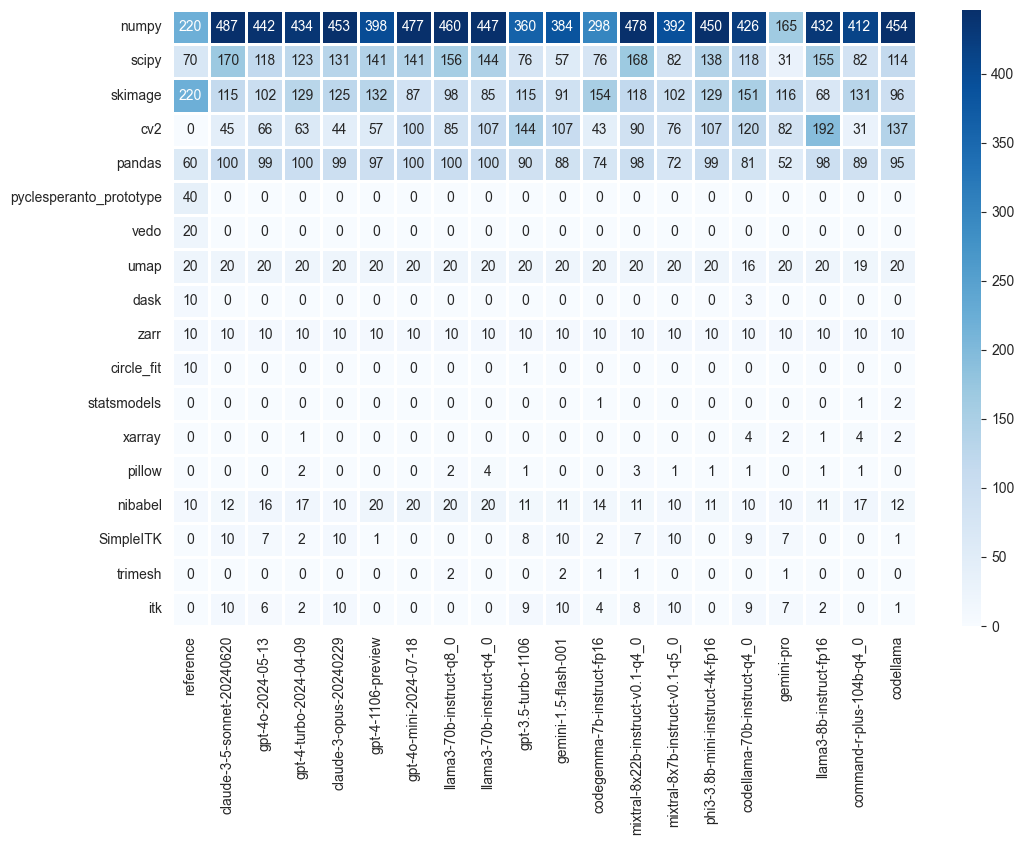

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

print(sns.__version__)
sns.set_style("white")

df = lib_counts

# Separate the numerical data for plotting and the string column for y-axis labels
numerical_data = df.select_dtypes(include=[np.number])
mean_values = numerical_data.mean().sort_values(ascending=False)

# Plotting
fig = plt.figure(figsize=(12,8))
#plot square heatmap entries
sns.heatmap(numerical_data, annot=True, linewidths=1, fmt=".0f", cbar_kws={'shrink': 1, 'aspect': 2*16}, cmap="Blues", robust=True)
plt.gca().set_xlabel('')

plt.savefig("../docs/paper/used_libraries_heatmap.png", dpi=300,bbox_inches="tight")
plt.show()

In [10]:
# Iterate over the columns and format new names
new_column_names = [f"\\rot{{{col}}}" for col in lib_counts.columns]

# Update the DataFrame columns
lib_counts.columns = new_column_names
lib_counts

,\rot{reference},\rot{claude-3-5-sonnet-20240620},\rot{gpt-4o-2024-05-13},\rot{gpt-4-turbo-2024-04-09},\rot{claude-3-opus-20240229},\rot{gpt-4-1106-preview},\rot{gpt-4o-mini-2024-07-18},\rot{llama3-70b-instruct-q8_0},\rot{llama3-70b-instruct-q4_0},\rot{gpt-3.5-turbo-1106},\rot{gemini-1.5-flash-001},\rot{codegemma-7b-instruct-fp16},\rot{mixtral-8x22b-instruct-v0.1-q4_0},\rot{mixtral-8x7b-instruct-v0.1-q5_0},\rot{phi3-3.8b-mini-instruct-4k-fp16},\rot{codellama-70b-instruct-q4_0},\rot{gemini-pro},\rot{llama3-8b-instruct-fp16},\rot{command-r-plus-104b-q4_0},\rot{codellama}
numpy,220,487,442,434,453,398,477,460,447,360,384,298,478,392,450,426,165,432,412,454
scipy,70,170,118,123,131,141,141,156,144,76,57,76,168,82,138,118,31,155,82,114
skimage,220,115,102,129,125,132,87,98,85,115,91,154,118,102,129,151,116,68,131,96
cv2,0,45,66,63,44,57,100,85,107,144,107,43,90,76,107,120,82,192,31,137
pandas,60,100,99,100,99,97,100,100,100,90,88,74,98,72,99,81,52,98,89,95
pyclesperanto_prototype,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
vedo,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
umap,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,16,20,20,19,20
dask,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0
zarr,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10


Next we save the dataframe as tex to disk, so that we can include it in the manuscript.

In [11]:
# Convert DataFrame to TeX format string
tex_str = lib_counts.to_latex()
tex_str = tex_str.replace("_", "\\_")
tex_str = tex_str.replace("prototype", "\\\\ prototype")

# Define filename for the TeX file
tex_filename = '../docs/paper/library_counts_table.tex'

# Write the TeX format string to a file
with open(tex_filename, 'w') as tex_file:
    tex_file.write(tex_str)